#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 11
**CH11B Are Australian weather forecasts well calibrated?**

using the australia-weather-forecasts dataset

version 1.0 2021-05-05

In [2]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import *
import sys
from patsy import dmatrices

In [3]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
data_in = dirname + "da_data_repo/australia-weather-forecasts/clean"
data_out = dirname + "da_case_studies/ch11-australia-rainfall-predict/"
output = dirname + "da_case_studies/ch11-australia-rainfall-predict/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [4]:
# Import the prewritten helper functions
from py_helper_functions import *

In [5]:
data = pd.read_csv(os.path.join(data_in, "rainfall_australia.csv"))
data = data.loc[
    (data["station_name"] == "DARWIN AIRPORT") & (data["bd_FC_Before_Start"] == 39)
].reset_index(drop=True)

In [6]:
data["rain_prob_fc"] = data["prob"] / 100

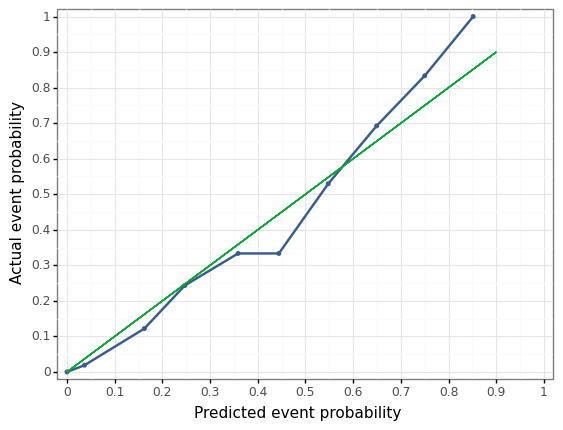

<ggplot: (323337810)>

In [7]:
create_calibration_plot(
    data,
    file_name="ch11-figure-6-weather-calib",
    prob_var="rain_prob_fc",
    actual_var="daily_sum",
    breaks=np.array([0, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
)

In [8]:
data["rain_prob_fc"].describe()

count    350.000000
mean       0.214600
std        0.230993
min        0.000000
25%        0.010000
50%        0.145000
75%        0.360000
max        0.880000
Name: rain_prob_fc, dtype: float64